<a href="https://colab.research.google.com/github/sajidhali/CodeWay1/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem  import LancasterStemmer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

**Importing** **data**

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [4]:
print(train_data.describe())

                                 Title    Genre  \
count                            12772    12772   
unique                           12772       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1     3181   

                                              Description  
count                                               12772  
unique                                              12762  
top      Award of the American academy of cinematograp...  
freq                                                    3  


In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12772 entries, 1 to 12772
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        12772 non-null  object
 1   Genre        12772 non-null  object
 2   Description  12772 non-null  object
dtypes: object(3)
memory usage: 399.1+ KB
None


In [6]:
print(train_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


In [7]:
test_path = "/content/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


<ipython-input-8-1d7767eae314>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
<ipython-input-8-1d7767eae314>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')


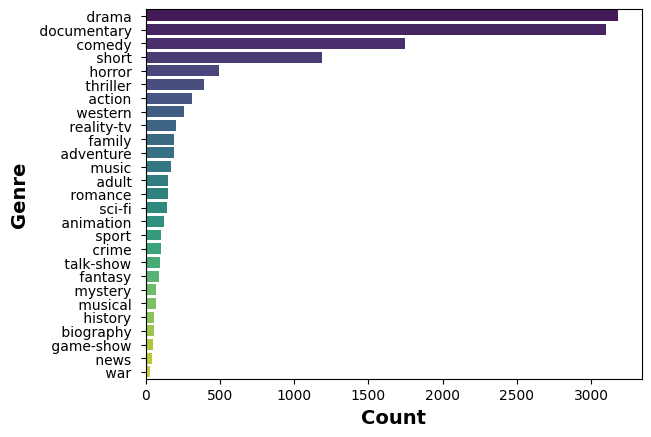

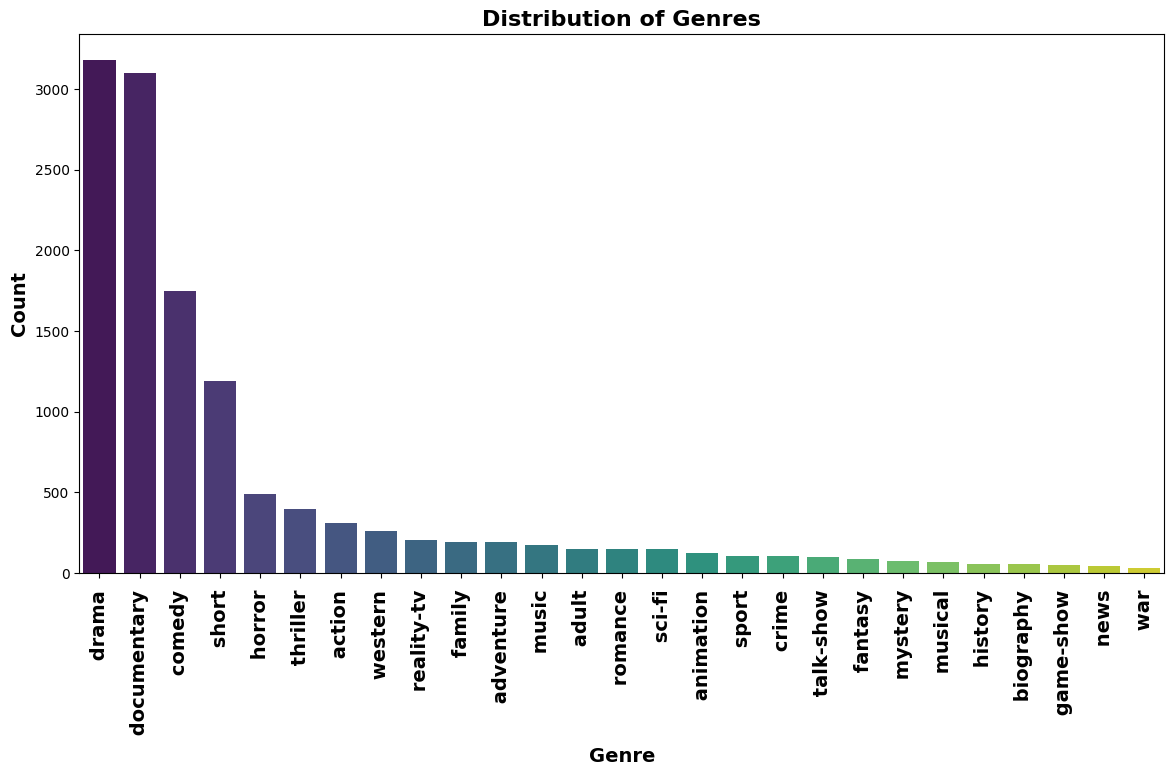

In [8]:
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [9]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
# Define the clean_text function
def clean_text(text):
  text = text.lower()
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'pic.\S+', '', text)
  text = re.sub(r"[^a-zA-Z+']", ' ', text)
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
  text = "".join([i for i in text if i not in string.punctuation])
  words = nltk.word_tokenize(text)
  stopwords = nltk.corpus.stopwords.words('english')
  text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
  text = re.sub("\s[\s]+", " ", text).strip()
  return text

train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

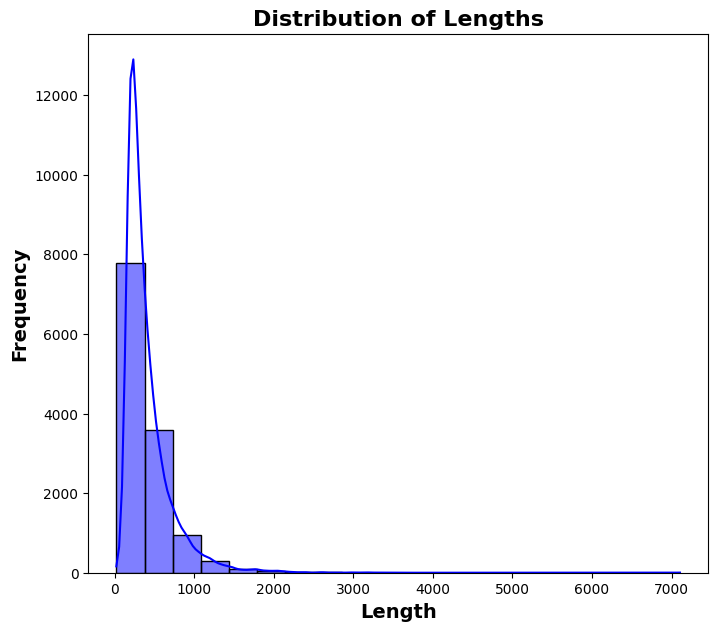

In [10]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [11]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer() # Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])
# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [12]:
# Split the data into training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = classifier.predict(X_val)
# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.4395303326810176
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        61
       adult        0.00      0.00      0.00        24
   adventure        0.00      0.00      0.00        33
   animation        0.00      0.00      0.00        15
   biography        0.00      0.00      0.00        18
      comedy        0.58      0.02      0.04       379
       crime        0.00      0.00      0.00        28
 documentary        0.55      0.86      0.67       629
       drama        0.37      0.89      0.52       647
      family        0.00      0.00      0.00        35
     fantasy        0.00      0.00      0.00        17
   game-show        0.00      0.00      0.00         8
     history        0.00      0.00      0.00        13
      horror        0.00      0.00      0.00       100
       music        0.00      0.00      0.00        41
     musical        0.00      0.00      0.00        11
     mystery        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [16]:
test_data.to_csv('predicted_genres.csv', index=False)